In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
X_train, y_train = X_train_full[5000:], y_train_full[5000:]
X_val, y_val = X_train_full[:5000], y_train_full[:5000]
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_train.shape

(55000, 28, 28, 1)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, 
                              padding="same", input_shape=[28,28,1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=3, 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 71s 40ms/step - loss: 0.2740 - accuracy: 0.9170 - val_loss: 0.0548 - val_accuracy: 0.9842
Epoch 2/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.1152 - accuracy: 0.9661 - val_loss: 0.0751 - val_accuracy: 0.9816
Epoch 3/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.0883 - accuracy: 0.9743 - val_loss: 0.0396 - val_accuracy: 0.9876
Epoch 4/10
1719/1719 [==============================] - 68s 40ms/step - loss: 0.0684 - accuracy: 0.9803 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 5/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 6/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0291 - val_accuracy: 0.9928
Epoch 7/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0305 -

In [6]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0188 - accuracy: 0.9946


[0.018794748932123184, 0.9945999979972839]

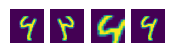

In [7]:
sample_org = X_train[2]
sample_01 = tf.image.random_flip_left_right(sample_org)
sample_02 = tf.image.random_crop(sample_org, size=[16,16,1])
sample_03 = tf.image.random_brightness(sample_org, max_delta=0.2)
plt.figure(figsize=(2,1))
plt.subplot(241)
plt.axis("off")
plt.imshow(sample_org)
plt.subplot(242)
plt.axis("off")
plt.imshow(sample_01)
plt.subplot(243)
plt.axis("off")
plt.imshow(sample_02)
plt.subplot(244)
plt.axis("off")
plt.imshow(sample_03)

In [8]:
def augment(image, label):
    image = tf.image.random_crop(image, size=[16,16,1])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return image,label

In [13]:
X_train_set = tf.data.Dataset.from_tensor_slices(X_train)
y_train_set = tf.data.Dataset.from_tensor_slices(y_train)
train_set = tf.data.Dataset.zip((X_train_set,y_train_set))

X_test_set = tf.data.Dataset.from_tensor_slices(X_test)
y_test_set = tf.data.Dataset.from_tensor_slices(y_test)
test_set = tf.data.Dataset.zip((X_test_set,y_test_set))

X_val_set = tf.data.Dataset.from_tensor_slices(X_val)
y_val_set = tf.data.Dataset.from_tensor_slices(y_val)
val_set = tf.data.Dataset.zip((X_val_set, y_val_set))
train_set

<_ZipDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [10]:
tf.keras.backend.clear_session()

In [17]:
model_02 = keras.models.Sequential()
model_02.add(keras.layers.Conv2D(filters=32, kernel_size=3, 
                              padding="same"))
model_02.add(keras.layers.BatchNormalization())
model_02.add(keras.layers.Activation("relu"))
model_02.add(keras.layers.MaxPooling2D(pool_size=2))

model_02.add(keras.layers.Conv2D(filters=64, kernel_size=3, 
                              padding="same"))
model_02.add(keras.layers.BatchNormalization())
model_02.add(keras.layers.Activation("relu"))
model_02.add(keras.layers.Conv2D(filters=64, kernel_size=3, 
                              padding="same"))
model_02.add(keras.layers.BatchNormalization())
model_02.add(keras.layers.Activation("relu"))
model_02.add(keras.layers.MaxPooling2D(pool_size=2))

model_02.add(keras.layers.Flatten())
model_02.add(keras.layers.Dropout(0.25))
model_02.add(keras.layers.Dense(128, activation="relu"))
model_02.add(keras.layers.Dropout(0.5))
model_02.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model_02.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model_02.fit(train_set, epochs=10, validation_data=(val_set))

Epoch 1/10


ValueError: in user code:

    File "D:\ml1\my_env\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "D:\ml1\my_env\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ml1\my_env\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "D:\ml1\my_env\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "D:\ml1\my_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ml1\my_env\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (28, 28, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(28, 28, 1), dtype=float64)
      • training=True
      • mask=None


In [ ]:
model_02.evaluate(test_set)